In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import seaborn as sb
from pandas.plotting import scatter_matrix
from scipy import stats
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [ ]:
#read the brain_size.csv and set parameters
data = pd.read_csv('bsgp7030/Stats_Python/brain_size.csv', sep=';', na_values = ".")
print (data)

#set up numpy arrays
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

#create DataFrame
df = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})
print(df)

#Returns the # of Columns and Rows in the table
print(df.shape)

#Examines specific columns
data.columns
print(data['Gender'])

#Selector
data[data['Gender'] == 'Female']['VIQ'].mean()

#Split DataFrame to Examine variable
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))
    
print(groupby_gender.mean())

#Create a Scatter Matrix for Weight, Height, and MRI_Count
pd.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

#Create a Scatter Matrix for PIQ, VIQ, and FSIQ
pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

In [ ]:
#Get T statistic and p-value for VIQ
print(stats.ttest_1samp(data['VIQ'], 0))

#2-sample t-test comparing the VIQ between Female and Male
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
print(stats.ttest_ind(female_viq,male_viq))

#2-sample test: Are FSIQ and PIQ significantly different?
print(stats.ttest_ind(data['FSIQ'], data['PIQ']))

#Paired test between FSIQ and PIQ
print(stats.ttest_rel(data['FSIQ'], data['PIQ']))

#1-sample test of the difference between FSIQ and PSIQ
print(stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0))

#Wilcoxon signed-rank test
print(stats.wilcoxon(data['FSIQ'], data['PIQ']))

In [ ]:
#Generate simulated data according to the model
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape) #normal distributed noise
data_ols = pd.DataFrame({'x': x, 'y': y}) #Create DataFrame
print(data_ols)

#Specify and OLS model and fit data
model_ols = ols("y ~ x", data_ols).fit()

#Inspect statistics from fit
print(model_ols.summary())

#read brain_size.csv and set as data
data = pd.read_csv('bsgp7030/Stats_Python/brain_size.csv', sep=';', na_values = ".")

#Comparison between IQ of male and female using a linear model
model_VIQ = ols("VIQ ~ Gender + 1", data).fit()
print(model_VIQ.summary())

#Create a long-form table to compare the different types of IQ
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)
model_dl = ols("iq ~ type", data_long).fit()
print(model_dl.summary()) 

#Retrieve T test and p values
print(stats.ttest_ind(data['FSIQ'], data['PIQ']))

In [54]:
#read iris.csv
data = pd.read_csv('bsgp7030/Stats_Python/iris.csv')

#Create model
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

#F-test of iris data
print(model.f_test([0, 1, -1, 0]))

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        12:10:34   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

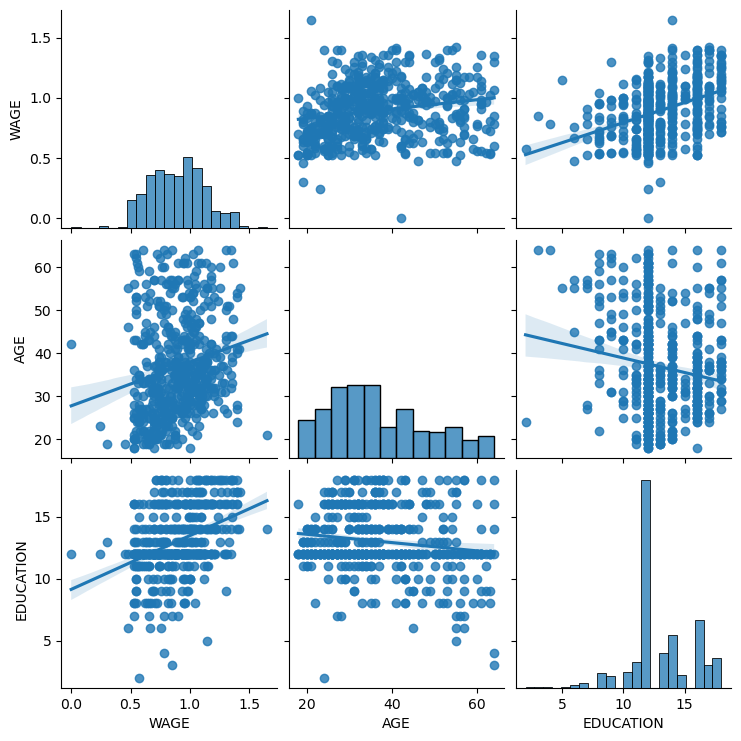

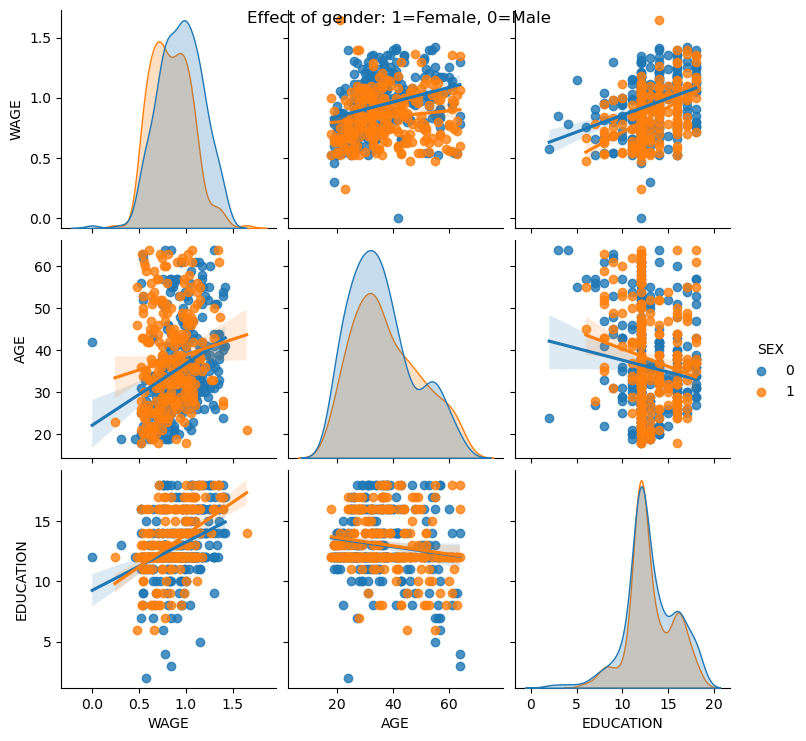

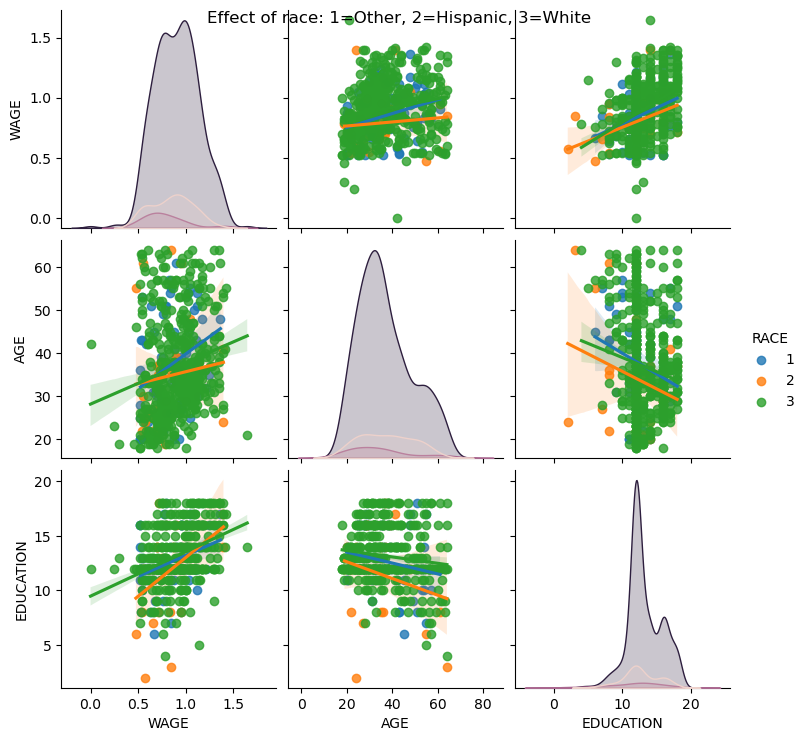

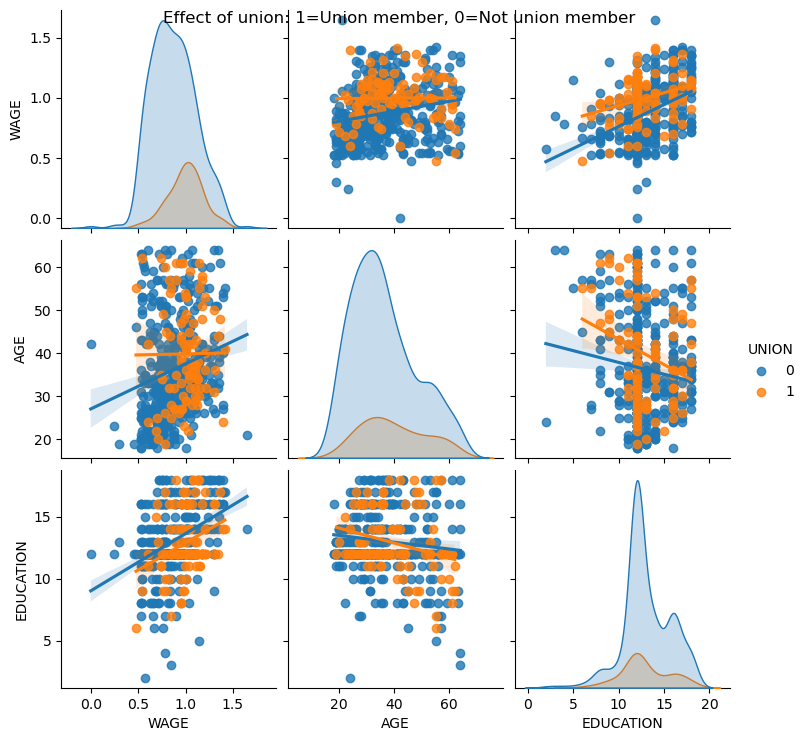

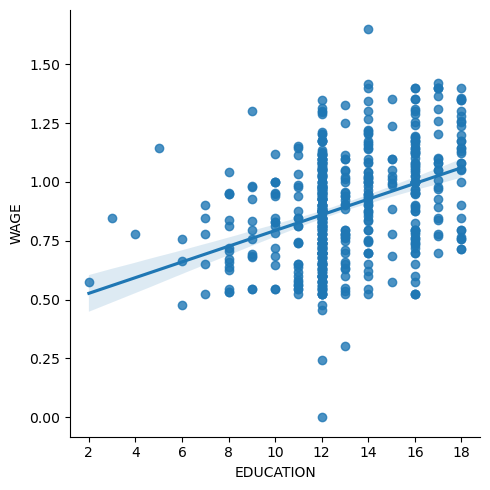

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

In [65]:
#Download data from URL
urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages','wages.txt')

# Give names to the columns
names = ['EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',]

short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, engine='python', header=None)
data.columns = short_names

#Log-transform the wages
data['WAGE'] = np.log10(data['WAGE'])

#Plot scatter matrices highlighting different aspects
sb.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')
sb.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

sb.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

sb.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

#Plot simple regression
sb.lmplot(y='WAGE', x='EDUCATION', data=data)
plt.show()

#Show data imported from wages.txt
print(data)

#Test interaction between wages education and sex
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data).fit()    
print(result.summary())  